# 1-Libraries Import

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


# 2-Load Dataset  

In [2]:
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# 3-Feature Selection

In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


# 4 – Scaling

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 5- Elbow Method

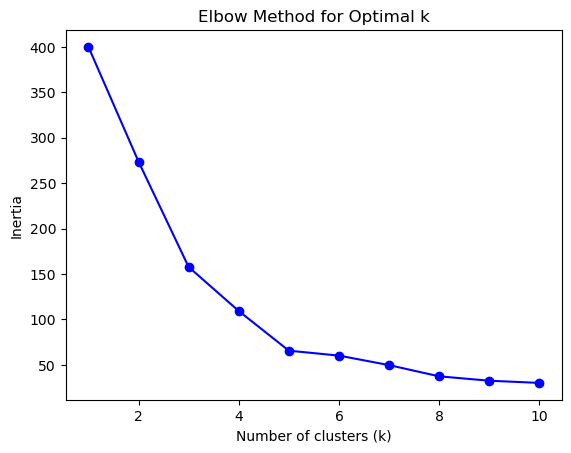

In [8]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


# 6- K Means Clustering

In [9]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


# 7-Cluster Visualization

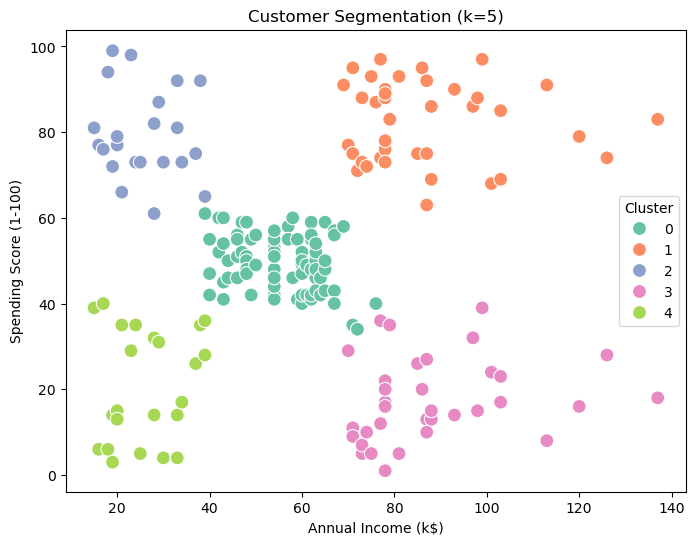

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)',
                hue='Cluster', 
                data=df, 
                palette='Set2', 
                s=100)
plt.title('Customer Segmentation (k=5)')
plt.show()



# 8-Average Income & Spending per Cluster


In [11]:
cluster_avg = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_avg)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


# 9-Pie Chart (Cluster Distribution) 

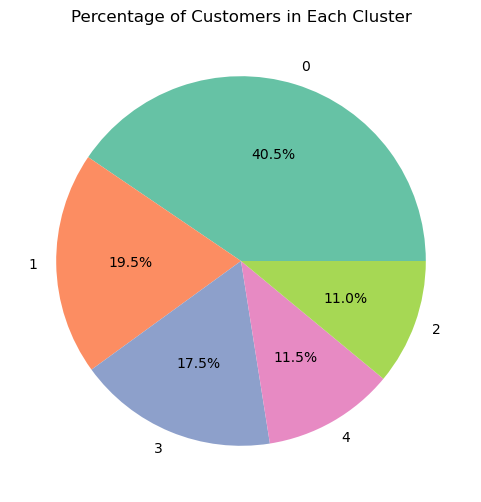

In [12]:
plt.figure(figsize=(6,6))
df['Cluster'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Percentage of Customers in Each Cluster')
plt.ylabel('')
plt.show()


# 10-Silhouette Score 

In [25]:
score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score for k=5: {score:.3f}")


Silhouette Score for k=5: 0.555


# 11-DBSCAN Clustering

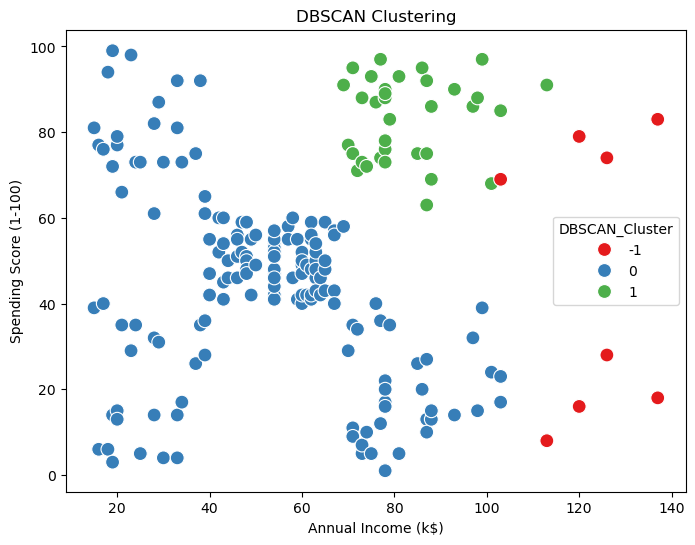

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)',
                hue='DBSCAN_Cluster', 
                data=df, 
                palette='Set1', 
                s=100)
plt.title('DBSCAN Clustering')
plt.show()


# 12-Final Cluster Stats

In [15]:
dbscan_avg = df.groupby('DBSCAN_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(dbscan_avg)


                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                      122.750000               46.875000
 0                       52.490446               43.101911
 1                       82.542857               82.800000


# 13-DBSCAN Cluster Count and Noise Count


In [17]:
print("\nDBSCAN Cluster Counts:")
print(df['DBSCAN_Cluster'].value_counts())



DBSCAN Cluster Counts:
DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


# 14-BSCAN Clusters Chart 

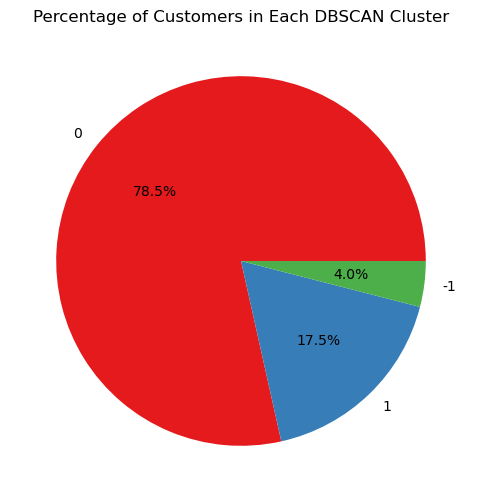

In [19]:
plt.figure(figsize=(6,6))
df['DBSCAN_Cluster'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Percentage of Customers in Each DBSCAN Cluster')
plt.ylabel('')
plt.show()


# 15-Silhouette Score Calculation for DBSCAN Clusters

In [23]:
mask = df['DBSCAN_Cluster'] != -1
if len(set(df.loc[mask, 'DBSCAN_Cluster'])) > 1:
    score_dbscan = silhouette_score(X_scaled[mask], df.loc[mask, 'DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN clusters (excluding noise): {score_dbscan:.3f}")
else:
    print("DBSCAN has less than 2 clusters, silhouette score cannot be calculated.")



Silhouette Score for DBSCAN clusters (excluding noise): 0.388


### In this analysis, we applied both K-Means and DBSCAN clustering techniques to segment customers based on their annual income and spending score. The K-Means algorithm, with an optimal cluster count of 5, provided well-separated and interpretable clusters, supported by a strong silhouette score of 0.555. DBSCAN offered a density-based perspective, identifying core clusters and noise points, though its silhouette score was slightly lower.These clusters reveal distinct customer profiles—from premium high spenders to budget-conscious individuals—offering valuable insights for targeted marketing strategies. Businesses can leverage this segmentation to personalize offers, optimize product placement, and enhance customer engagement across different income and spending behaviors.